# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [2]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [5]:
import numpy as np 
df=pd.get_dummies(titanic)
np.mean(df.values)

0.4

# Apriori Algorithm 

In [8]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.320763,(Class_3rd)
1,0.402090,(Class_Crew)
2,0.213539,(Gender_Female)
3,0.786461,(Gender_Male)
4,0.950477,(Age_Adult)
5,0.676965,(Survived_No)
6,0.323035,(Survived_Yes)
7,0.231713,"(Class_3rd, Gender_Male)"
8,0.284871,"(Class_3rd, Age_Adult)"
9,0.239891,"(Class_3rd, Survived_No)"


In [24]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,"(Survived_No, Class_Crew)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
18,(Class_Crew),"(Age_Adult, Gender_Male)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480
20,"(Survived_No, Class_Crew)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983
31,"(Age_Adult, Survived_No, Class_Crew)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983
36,(Class_Crew),"(Age_Adult, Gender_Male, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
3,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
16,"(Age_Adult, Class_Crew)",(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
21,(Class_Crew),"(Gender_Male, Survived_No)",0.402090,0.619718,0.304407,0.757062,1.221623,0.055225,1.565346
33,"(Age_Adult, Class_Crew)","(Gender_Male, Survived_No)",0.402090,0.619718,0.304407,0.757062,1.221623,0.055225,1.565346
34,"(Gender_Male, Class_Crew)","(Age_Adult, Survived_No)",0.391640,0.653339,0.304407,0.777262,1.189676,0.048533,1.556362


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [7]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
65,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
68,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
101,"(Age_Adult, Gender_Male)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
96,"(Class_Crew, Survived_No)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
48,"(Age_Adult, Gender_Male)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
49,(Class_Crew),"(Age_Adult, Gender_Male)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [25]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
3,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
4,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf
5,(Class_Crew),(Survived_No),0.402090,0.676965,0.305770,0.760452,1.123325,0.033569,1.348519
6,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
7,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
8,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
9,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
10,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
14,"(Class_3rd, Age_Adult)",(Survived_No),0.284871,0.676965,0.216265,0.759171,1.121433,0.023418,1.341344


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

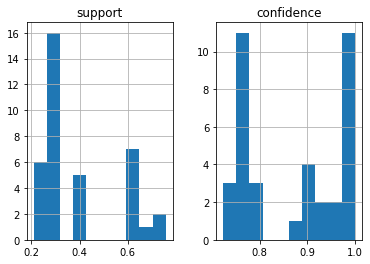

In [16]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

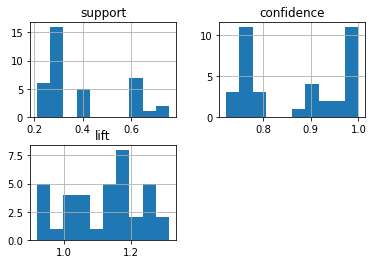

In [17]:
rules[['support','confidence','lift']].hist()

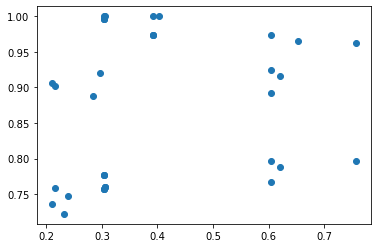

In [19]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()


C:\Users\ExcelR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


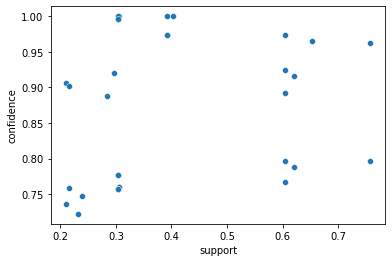

In [20]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules)

plt.show()